In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df1 = pd.read_csv('IMDB top 1000 clean new.csv')

In [3]:
df1

,Title,Certificate,Duration(minutes),Genre,Rate,Metascore,Description,Cast,Info,Year,...,Genre3,Votes,Gross(in million dollars),Director1,Director2,Director3,Actor1,Actor2,Actor3,Actor4
0,The Shawshank Redemption,R,142,Drama,9.3,80.0,Two imprisoned men bond over a number of years...,"Director: Frank Darabont | Stars: Tim Robbins,...","Votes: 2,295,987 | Gross: $28.34M",1994,...,NaN,2295987,28.34,Frank Darabont,NaN,NaN,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler
1,The Godfather,R,175,"Crime, Drama",9.2,100.0,The aging patriarch of an organized crime dyna...,Director: Francis Ford Coppola | Stars: Marlon...,"Votes: 1,584,782 | Gross: $134.97M",1972,...,NaN,1584782,134.97,Francis Ford Coppola,NaN,NaN,Marlon Brando,Al Pacino,James Caan,Diane Keaton
2,The Dark Knight,PG-13,152,"Action, Crime, Drama",9.0,84.0,When the menace known as the Joker wreaks havo...,Director: Christopher Nolan | Stars: Christian...,"Votes: 2,260,649 | Gross: $534.86M",2008,...,Drama,2260649,534.86,Christopher Nolan,NaN,NaN,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine
3,The Godfather: Part II,R,202,"Crime, Drama",9.0,90.0,The early life and career of Vito Corleone in ...,Director: Francis Ford Coppola | Stars: Al Pac...,"Votes: 1,107,253 | Gross: $57.30M",1974,...,NaN,1107253,57.30,Francis Ford Coppola,NaN,NaN,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton
4,The Lord of the Rings: The Return of the King,PG-13,201,"Action, Adventure, Drama",8.9,94.0,Gandalf and Aragorn lead the World of Men agai...,"Director: Peter Jackson | Stars: Elijah Wood, ...","Votes: 1,614,369 | Gross: $377.85M",2003,...,Drama,1614369,377.85,Peter Jackson,NaN,NaN,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,Groundhog Day,PG,101,"Comedy, Fantasy, Romance",8.0,72.0,A weatherman finds himself inexplicably living...,"Director: Harold Ramis | Stars: Bill Murray, A...","Votes: 571,642 | Gross: $70.91M",1993,...,Romance,571642,70.91,Harold Ramis,NaN,NaN,Bill Murray,Andie MacDowell,Chris Elliott,Stephen Tobolowsky
394,"Blood In, Blood Out",R,180,"Crime, Drama",8.0,NaN,Based on the true life experiences of poet Jim...,Director: Taylor Hackford | Stars: Damian Chap...,"Votes: 28,464 | Gross: $4.50M",1993,...,NaN,28464,4.50,Taylor Hackford,NaN,NaN,Damian Chapa,Jesse Borrego,Benjamin Bratt,Enrique Castillo
395,Scent of a Woman,R,156,Drama,8.0,NaN,A prep school student needing money agrees to ...,"Director: Martin Brest | Stars: Al Pacino, Chr...","Votes: 256,515 | Gross: $63.90M",1992,...,NaN,256515,63.90,Martin Brest,NaN,NaN,Al Pacino,Chris O'Donnell,James Rebhorn,Gabrielle Anwar
396,Aladdin,G,90,"Animation, Adventure, Comedy",8.0,86.0,A kindhearted street urchin and a power-hungry...,"Directors: Ron Clements, John Musker | Stars: ...","Votes: 367,489 | Gross: $217.35M",1992,...,Comedy,367489,217.35,Ron Clements,John Musker,NaN,Scott Weinger,Robin Williams,Linda Larkin,Jonathan Freeman


<Axes: title={'center': 'Rate'}, xlabel='Certificate'>

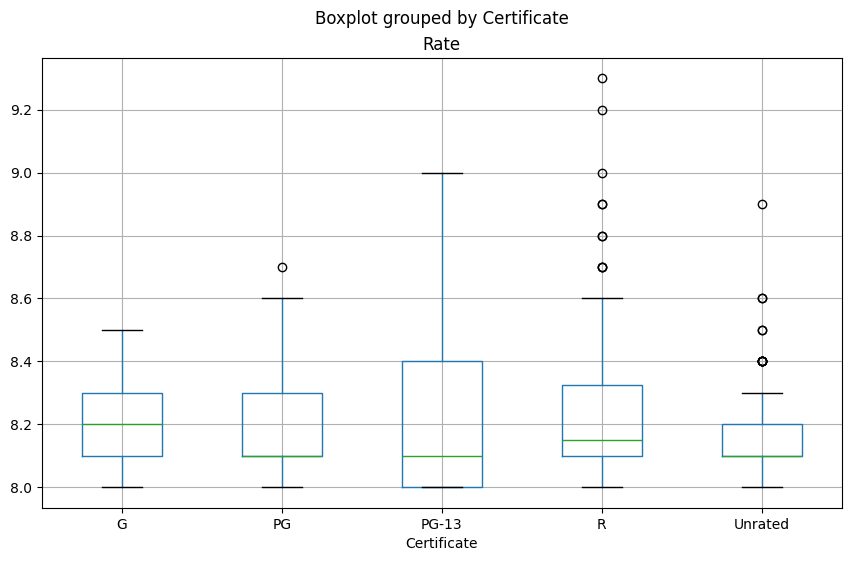

In [4]:
df1.boxplot(column='Rate', by='Certificate', figsize=(10, 6))

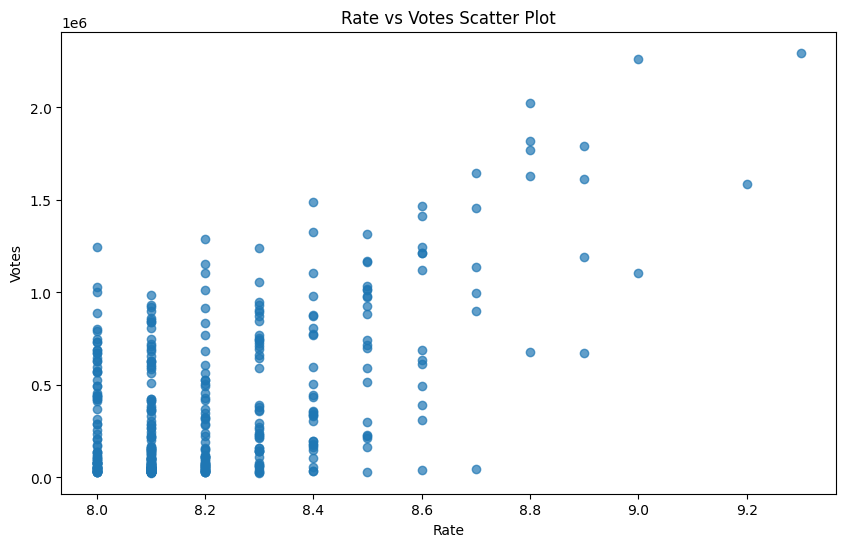

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df1['Rate'], df1['Votes'], alpha=0.7)
plt.xlabel('Rate')
plt.ylabel('Votes')
plt.title('Rate vs Votes Scatter Plot')
plt.show()

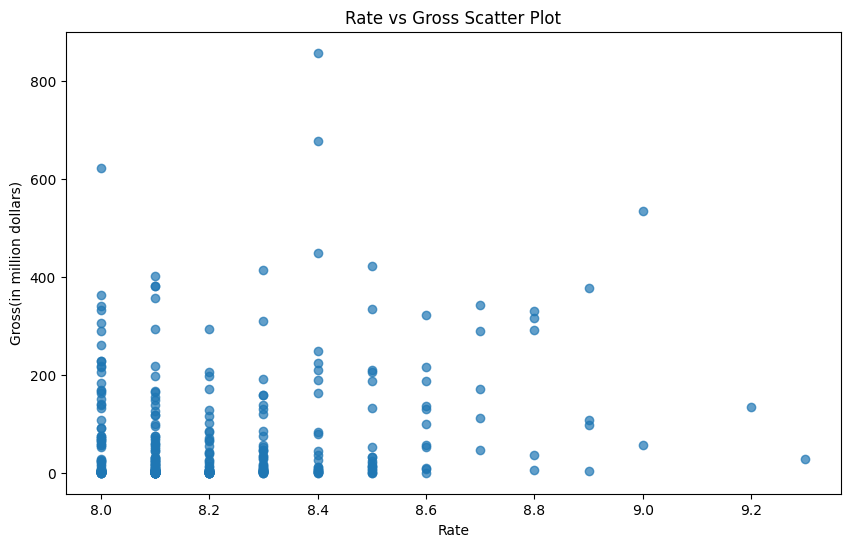

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df1['Rate'], df1['Gross(in million dollars)'], alpha=0.7)
plt.xlabel('Rate')
plt.ylabel('Gross(in million dollars)')
plt.title('Rate vs Gross Scatter Plot')
plt.show()

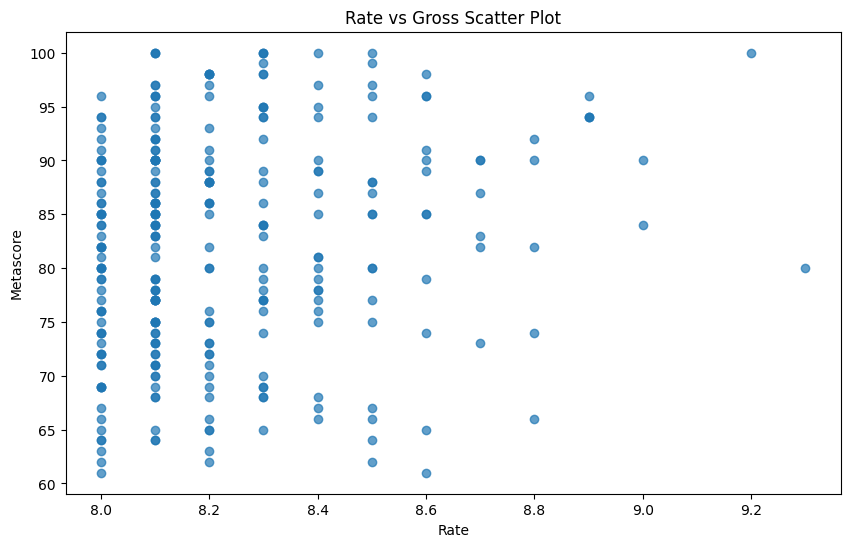

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df1['Rate'], df1['Metascore'], alpha=0.7)
plt.xlabel('Rate')
plt.ylabel('Metascore')
plt.title('Rate vs Gross Scatter Plot')
plt.show()

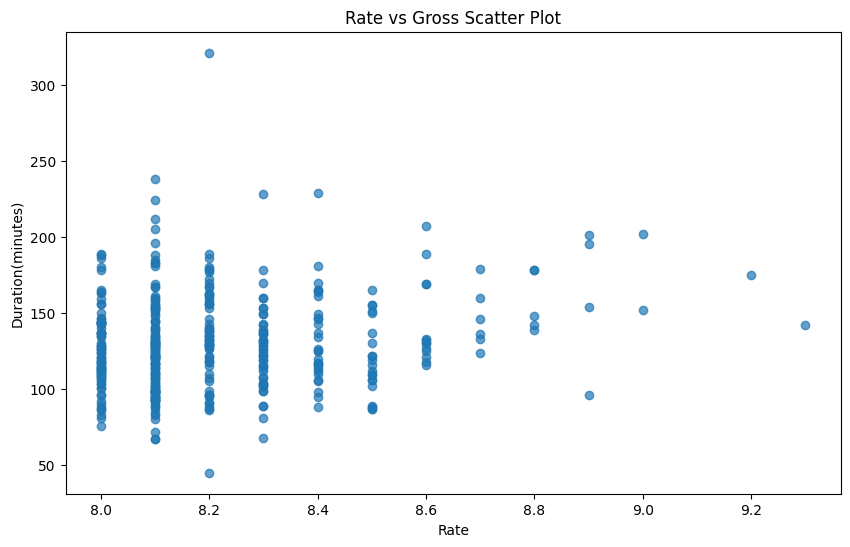

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df1['Rate'], df1['Duration(minutes)'], alpha=0.7)
plt.xlabel('Rate')
plt.ylabel('Duration(minutes)')
plt.title('Rate vs Gross Scatter Plot')
plt.show()

In [83]:
from itertools import combinations
from collections import Counter

genre_pairs = []

for _, row in df1.iterrows():
    genres = [row['Genre1'], row['Genre2'], row['Genre3']]  # Replace with actual column names
    genres = [g for g in genres if pd.notnull(g)]  # Remove null genres
    pairs = combinations(genres, 2)  # Create all possible genre pairs
    genre_pairs.extend(pairs)

# Count occurrences of each pair
pair_counts = Counter(genre_pairs)

# Create the graph
G = nx.Graph()
for pair, count in pair_counts.items():
    G.add_edge(pair[0], pair[1], weight=count)


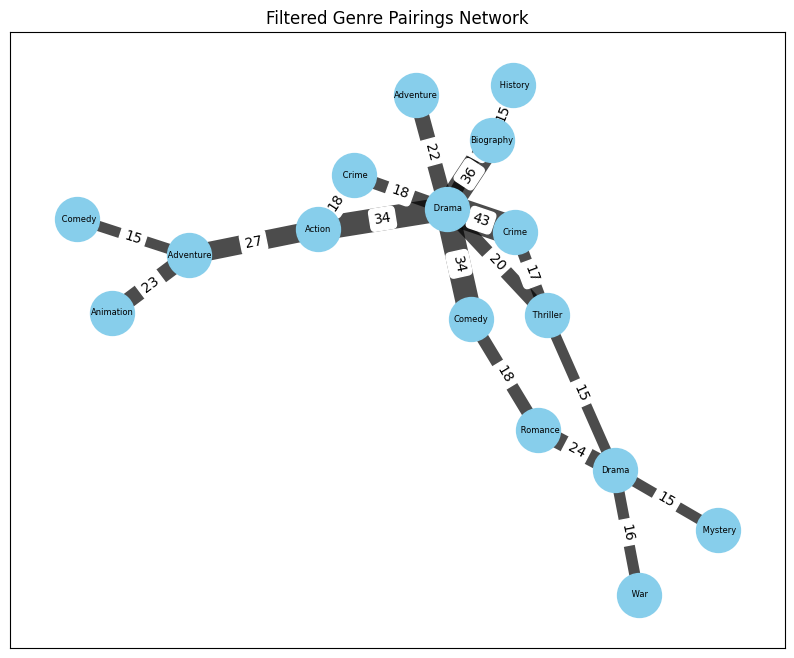

In [84]:
# Set a threshold for minimum edge weight
threshold = 15  # Only show genre pairs with at least 10 occurrences

# Filter edges based on the threshold
filtered_edges = [(u, v, d) for u, v, d in G.edges(data=True) if d['weight'] >= threshold]

# Create a new filtered graph
G_filtered = nx.Graph()
G_filtered.add_edges_from([(u, v, {'weight': d['weight']}) for u, v, d in filtered_edges])

# Draw the filtered graph
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G_filtered, seed=42)
nx.draw_networkx_nodes(G_filtered, pos, node_size=1000, node_color="skyblue")
nx.draw_networkx_edges(G_filtered, pos, width=[G_filtered[u][v]['weight'] / 2 for u, v in G_filtered.edges], alpha=0.7)
nx.draw_networkx_labels(G_filtered, pos, font_size=6, font_family="sans-serif")
edge_labels = nx.get_edge_attributes(G_filtered, 'weight')
nx.draw_networkx_edge_labels(G_filtered, pos, edge_labels=edge_labels)
plt.title("Filtered Genre Pairings Network")
plt.show()


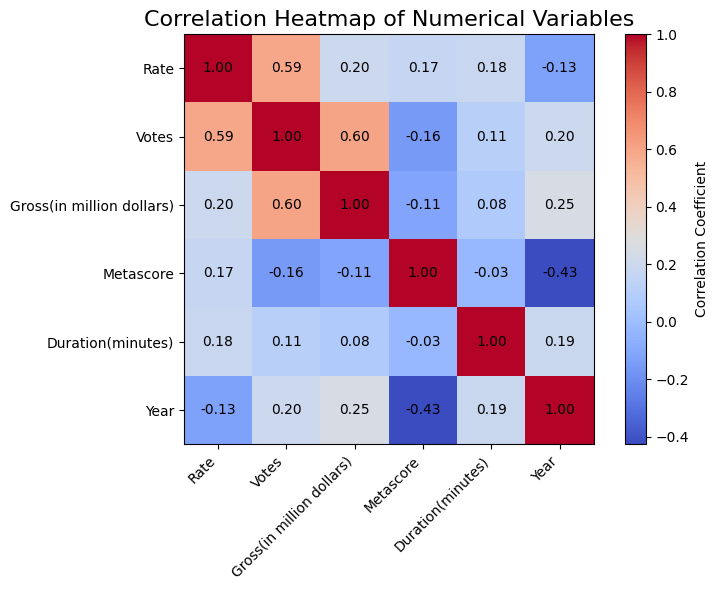

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load your dataset (replace 'your_dataset.csv' with your actual dataset file)

# Select numerical columns
numerical_columns = ['Rate', 'Votes', 'Gross(in million dollars)', 'Metascore', 'Duration(minutes)', 'Year']  # Replace with actual column names
df_numeric = df1[numerical_columns]

# Compute the correlation matrix
correlation_matrix = df_numeric.corr()

# Create the heatmap
plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar(label='Correlation Coefficient')

# Add labels
plt.xticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45, ha='right')
plt.yticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Heatmap of Numerical Variables', fontsize=16)

# Annotate cells with correlation values
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        plt.text(j, i, f"{correlation_matrix.iloc[i, j]:.2f}",
                 ha='center', va='center', color='black')

# Show the plot
plt.tight_layout()
plt.show()
